# K-Means on driver data

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [66]:
df=pd.read_csv("D:\\fortray\\LVC Datasets\\Lesson 5\\Dataset\\driver-data.csv")

In [67]:
df

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


In [68]:
df.columns

Index(['id', 'mean_dist_day', 'mean_over_speed_perc'], dtype='object')

In [69]:
df.isnull().sum(axis=0)

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

Text(0, 0.5, 'mean_over_speed_perc')

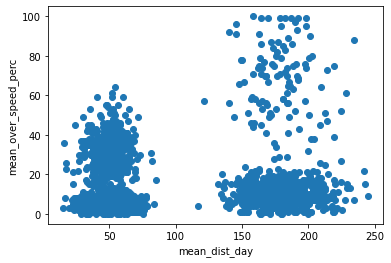

In [70]:
plt.scatter(df["mean_dist_day"],df["mean_over_speed_perc"])
plt.xlabel("mean_dist_day")
plt.ylabel("mean_over_speed_perc")

In [71]:
df.dtypes

id                        int64
mean_dist_day           float64
mean_over_speed_perc      int64
dtype: object

In [72]:
df=df.drop(["id"],axis=1)


In [73]:
df.columns

Index(['mean_dist_day', 'mean_over_speed_perc'], dtype='object')

In [74]:
from sklearn.cluster import KMeans

In [75]:
kmeans = KMeans(n_clusters=3)


In [76]:
kmeans.fit(df)

KMeans(n_clusters=3)

In [77]:
kmeans.cluster_centers_

array([[180.34311782,  10.52011494],
       [ 50.04763438,   8.82875   ],
       [177.83509615,  70.28846154]])

In [78]:
y_predicted = kmeans.fit_predict(df)
y_predicted 

array([1, 1, 1, ..., 0, 0, 0])

In [79]:
df['cluster']=y_predicted
df.sample(5)

,mean_dist_day,mean_over_speed_perc,cluster
676,51.35,3,1
755,32.10,2,1
1181,41.83,5,1
788,32.12,6,1
353,43.47,33,1


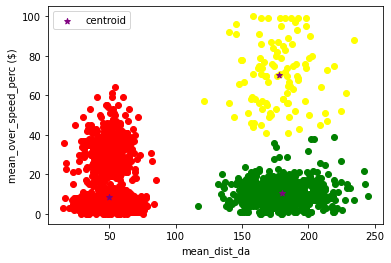

In [80]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['mean_dist_day'],df1['mean_over_speed_perc'],color='green')
plt.scatter(df2['mean_dist_day'],df2['mean_over_speed_perc'],color='red')
plt.scatter(df3['mean_dist_day'],df3['mean_over_speed_perc'],color='yellow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('mean_dist_da')
plt.ylabel('mean_over_speed_perc ($)')
plt.legend()

In [86]:
#Checking the optimal k value for k values 2-10(the cluster will be more than 1 so,2-10)
sse = []
k_rng = range(2,10)
for k in k_rng:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['mean_dist_day',"mean_over_speed_perc"]])
    sse.append(kmeans.inertia_)

In [87]:
#sum of squared distances(sse) from each point is assigned to its center (inertia).

In [88]:
sse

[1316420.8509477214,
 992634.0606702507,
 719614.24814618,
 534944.0181026915,
 372866.6886918841,
 319940.789803604,
 277008.4089356481,
 252617.77427387759]

In [89]:
#This is the list of errors for each k value ranging from 2-10

In [90]:
#WE find the optimal k value using the elbow method.

In [91]:
#When the inertias are plotted and the plot looks like an arm, the “elbow” (the point of inflection on the curve) is the best value of k.

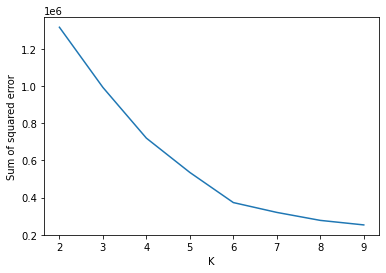

In [92]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [93]:
#k=4 can be selected from this elbow method


In [106]:
kmeans = KMeans(n_clusters=6)

In [107]:
kmeans.fit(df)

KMeans(n_clusters=6)

In [108]:
y_predicted = kmeans.fit_predict(df)
y_predicted 

array([3, 3, 3, ..., 5, 5, 5])

In [109]:
df['cluster']=y_predicted
df.sample(5)

,mean_dist_day,mean_over_speed_perc,cluster
1752,56.72,3,1
898,51.20,6,1
2926,48.71,5,4
1728,55.04,5,1
497,45.08,5,4


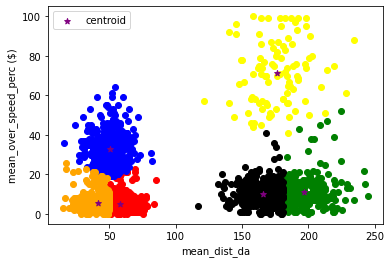

In [112]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==5]
plt.scatter(df1['mean_dist_day'],df1['mean_over_speed_perc'],color='green')
plt.scatter(df2['mean_dist_day'],df2['mean_over_speed_perc'],color='red')
plt.scatter(df3['mean_dist_day'],df3['mean_over_speed_perc'],color='yellow')
plt.scatter(df4['mean_dist_day'],df4['mean_over_speed_perc'],color='blue')
plt.scatter(df5['mean_dist_day'],df5['mean_over_speed_perc'],color='orange')
plt.scatter(df6['mean_dist_day'],df6['mean_over_speed_perc'],color='black')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('mean_dist_da')
plt.ylabel('mean_over_speed_perc ($)')
plt.legend()

In [114]:
df['cluster'] = y_predicted 
df['cluster'].value_counts()

1    1449
4    1348
3     403
5     371
0     330
2      99
Name: cluster, dtype: int64